# DIABETES LEARNING



In [1]:
isGoogleColab = True

# Notes

- check these blog posts: https://muellerzr.github.io/fastblog/ and his course: https://walkwithfastai.com/intro.contribute
- learner.export() already save all the transforms that will be applied during inference time, so it is not necessary to resize or normalize stats. If running outside the model outside fastai, check: https://forums.fast.ai/t/do-we-need-to-normalize-single-image-before-running-predict-function-on-it/44301/4
- to_fp16() is mixed precision
- item_tfms already apply the resize before collating the images in a batch. So it is not necessary to do this manually
- aug_tfms will only be applied on train_dl. validation and test will not be affected
- test_dl is a testing dataloader that uses the same transforms as train_dl and valid_dl, but with new data
- check images cleaner in the future
- cross validation: check walkwithfastai video 3 or https://forums.fast.ai/t/is-it-possible-to-implement-cross-validation-in-fastai/44961/15 or https://forums.fast.ai/t/am-i-doing-k-fold-cross-validation-right/84738/6  
- stratification in Kfold and Train_Test split for Multi Label problems is not straighforward. Check http://scikit.ml/index.html#. Use for now balanced datasets!!!!



# Installation

## Kill all other GPU sessions

Run the first time this cell. Then, restart your session and run again the notebook without this code.

In [ ]:
  #!kill -9 -1

## Keep Session Alive

Put this javascript code in the browser console

In [ ]:
# function ClickConnect(){
#    console.log("Working");
#    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click()
# }  setInterval(ClickConnect,300000)

## Update ipython/ipykernel (Colab)

The Colab session can fail when running the first time this cell. Just run it a second time.

In [ ]:
# This magic cell should be put first in your colab notebook. 
# It'll automatically upgrade colab's really antique ipython/ipykernel to their 
# latest versions which are required for packages like ipyexperiments 

# from packaging import version
# import IPython, ipykernel
# IPython.__version__
# if version.parse(IPython.__version__) <= version.parse("5.5.0"):
#     !pip install -q --upgrade ipython
#     !pip install -q --upgrade ipykernel
    
#     import os
#     import signal
#     os.kill(os.getpid(), signal.SIGTERM)
# print(f"ipykernel=={ipykernel.__version__}")
# print(f"IPython=={IPython.__version__}")

In [ ]:
# new (large)
# !pip install ipyexperiments
# new (large)
# from ipyexperiments import IPyExperimentsPytorch
# exp = IPyExperimentsPytorch()

## Check GPU e CPU RAM

In [2]:
if isGoogleColab:
    
    import torch
    from pynvml import *
    nvmlInit()
    def log_mem():
        h = nvmlDeviceGetHandleByIndex(0)
        info = nvmlDeviceGetMemoryInfo(h)
        print(f'GPU total Memory    : {info.total}')
        print(f'GPU free Memory     : {info.free}')
        print(f'GPU Memory used     : {info.used}')
    torch.ones(1).to(0)
    log_mem()

    !nvidia-smi

GPU total Memory    : 15843721216
GPU free Memory     : 14723842048
GPU Memory used     : 1119879168
Tue Jul 20 17:45:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W /  70W |   1068MiB / 15109MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+-----------

## Mount the Google Drive to Google Colab

In [3]:
if isGoogleColab:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    path_to_drive = "/content/drive/MyDrive/"
    sys.path.append(path_to_drive + 'UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/') #make src files importable

else:
    path_to_drive = "./"

Mounted at /content/drive


In [173]:
!unzip "/content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/dataset_FoodSeg103/FoodSeg103.zip" -d "/content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/dataset_FoodSeg103/"

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/dataset_FoodSeg103/FoodSeg103/Images/ann_dir/train/00000481.png  
  inflating: /content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/dataset_FoodSeg103/__MACOSX/FoodSeg103/Images/ann_dir/train/._00000481.png  
  inflating: /content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/dataset_FoodSeg103/FoodSeg103/Images/ann_dir/train/00001947.png  
  inflating: /content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/dataset_FoodSeg103/__MACOSX/FoodSeg103/Images/ann_dir/train/._00001947.png  
  inflating: /content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/dataset_FoodSeg103/FoodSeg103/Images/ann_dir/train/00001774.png  
  inflating: /content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/dataset_FoodSeg103/__MACOSX/FoodSeg103/Images/ann_dir/train/._00001774.png  
  inflating: /

In [ ]:
#!unrar x "/content/drive/My Drive/Colab Notebooks/DiabetesLearning/augmentedDataset_v2.rar" "/content/drive/My Drive/Colab Notebooks/DiabetesLearning/"
#!unrar x "/content/drive/My Drive/Colab Notebooks/DiabetesLearning/augmentedDataset.rar" # extrai local
#!unzip "/content/drive/My Drive/Colab Notebooks/DiabetesLearning/database.zip" -d "/content/drive/My Drive/Colab Notebooks/DiabetesLearning/"

## Install Deep Learning libraries

In [ ]:
# !pip install torch==1.9.0
#!pip install fastai==2.4.1 
#!pip install wandb

##restart runtime!!!

In [5]:
import sys; print('Python:',sys.version)
import torch; print('Pytorch:',torch.__version__)
import fastai; print('Fastai:',fastai.__version__)

Python: 3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]
Pytorch: 1.9.0+cu102
Fastai: 2.4.1


# Train your model

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.callback.wandb import *
import torch
import torchvision
from PIL import Image
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## Data

In [137]:
path = path_to_drive + 'UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint2/' 
path_anno = path + 'gt/'
path_img = path + 'done/'

#funcao que pega a imagem de anotacoes correspondente, dado a imagem original de entrada
get_y_fn = lambda x : path_anno + '/' + f'{x.stem}_GT.png'

In [138]:
np.random.seed(2) #mesma semente para todas as vezes que executar
randomSeed = 2

label_fnames = get_image_files(path_anno)
print(label_fnames[:3])
fnames = get_image_files(path_img)
print(fnames[:3])

len(fnames), len(label_fnames)

[Path('/content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint2/gt/153_GT.png'), Path('/content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint2/gt/541_GT.png'), Path('/content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint2/gt/582_GT.png')]
[Path('/content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint2/done/821.jpg'), Path('/content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint2/done/114.jpg'), Path('/content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint2/done/543.jpeg')]


(423, 423)

In [139]:
codes = np.loadtxt(path + 'classesNumber.txt', dtype=str, delimiter='\n',encoding='utf')
codesId = [code.split(": ")[0] for code in codes]
codes = [code.split(": ")[1] for code in codes] #pega apenas o nome de cada classe e ignora o ID
len(codes)

16

In [140]:
### fix GT ids: masks must be [0, 1, …, K-1] where K is the number of categories

def createAdjustedGroundTruthIds(fnames):
  "Gather the codes from a list of `fnames`"
  vals = set()
  for fname in fnames:
    msk = np.array(PILMask.create(fname))
    for val in np.unique(msk):
      if val not in vals:
        vals.add(val)
  vals = list(sorted(vals))

  for i,val in enumerate(vals):
    adjustedGroundTruthIds[i] = vals[i]

def get_y_fn(item):
  "Grab a mask from a `filename` and adjust the pixels based on `adjustedGroundTruthIds`"
  itemGtPath = path_anno + '/' + f'{item.stem}_GT.png'
  msk = np.array(PILMask.create(itemGtPath))
  mx = np.max(msk)
  for i, val in enumerate(adjustedGroundTruthIds):
    msk[msk==adjustedGroundTruthIds[i]] = val
  uniqueIds = np.unique(msk,return_counts=False)[np.unique(msk,return_counts=False) != 0]
  return uniqueIds #[codes[i] for i in uniqueIds]

adjustedGroundTruthIds = dict()
adjustedGroundTruthIds = {i : int(codesId[i]) for i in range(len(codes))}
#createAdjustedGroundTruthIds(label_fnames)


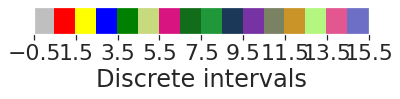

In [141]:
# define colormap for masks

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = matplotlib.colors.ListedColormap([np.random.rand(3,) for i in range(0,len(codes))])
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.75, .75, .75, 1.0) # nao alimento -> cinza
cmaplist[1] = "red" # nao registrado
cmaplist[2] = "yellow" #arroz integral
cmaplist[3] = "blue" #arroz branco
cmaplist[4] = "green" #feijao

cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = [i-0.5 for i in range(0,len(codes)+1)] # intervalos devem conter apenas o numero inteiro, entao ir de 0.5 em 0.5
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

cb2 = matplotlib.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                spacing='proportional',
                                orientation='horizontal')
cb2.set_label('Discrete intervals')
fig.show()

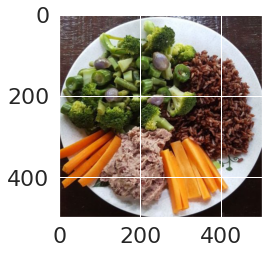

Ground truth Codes [1 4 8]
/content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint2/done/821.jpg


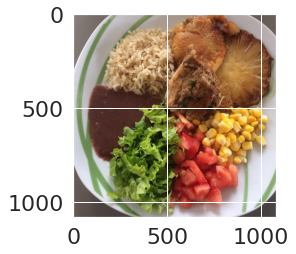

Ground truth Codes [ 1  3  4  7  8 15]
/content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint2/done/114.jpg


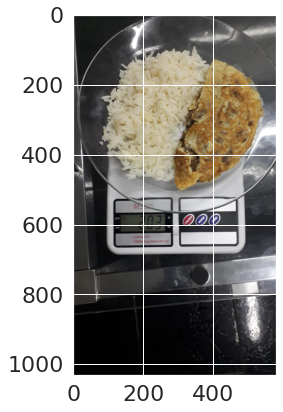

Ground truth Codes [ 1 12]
/content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint2/done/543.jpeg


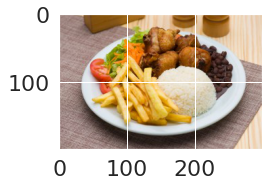

Ground truth Codes [1 2 5 7 8]
/content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint2/done/708.jpg


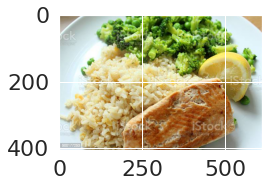

Ground truth Codes [1 3 4 8]
/content/drive/MyDrive/UnB/TCC/DevDiabetesLearning/DiabetesLearningAI/datasetTCC_v1/sprint2/done/767.jpg


In [142]:
### VISUALIZACAO DA MÁSCARA FICA COM A BORDA ESTRANHA, MAS ELA ESTÁ CORRETA COMO PODE SER VISTO NOS CODIGOS DO GROUND TRUTH

for idx in range(0,5):
  fig = plt.figure(figsize=(8,8))

  img = Image.open(fnames[idx])
  arr = np.asarray(img)
  ax1 = fig.add_subplot(1,2,1)
  ax1.imshow(arr)

  uniqueIds = get_y_fn(fnames[idx]) # use this when 'adjustedGroundTruthIds' is necessary
  #img1 = Image.open(get_y_fn(fnames[idx]))
  #arr = np.asarray(img1)
  #ax1 = fig.add_subplot(1,2,2)
  #ax1.imshow(arr, cmap=cmap, norm=norm)
  plt.show()

  print("Ground truth Codes", uniqueIds)
  print(fnames[idx])


## Data Augmentation

In [143]:
size = (256, 256)
item_tfms = [Resize(size, method=ResizeMethod.Squish, resamples=(Image.NEAREST,Image.NEAREST))]
aug_tfms = aug_transforms(mult=1, flip_vert=True, size=size)

## Dataloaders

In [144]:
# dataset balance method. choose one of them or none

lossClassWeights = None
sampler = None

#### load class weights from pickle ####
# with open( path + "classWeightsSprint1.pkl", 'rb') as f:
#   weights = pickle.load(f)
# classWeights = torch.FloatTensor(weights).cuda() 

#### assign class weights empirically ####
# classWeights = torch.ones(len(codes)).cuda()
# classWeights[0] = 0.1

### 1. class weights in loss function ###
# lossClassWeights = classWeights

### 2. oversampling ### not yet implemented, check here https://forums.fast.ai/t/oversampling-in-fastai2/73721/14

# sampler = torch.utils.data.sampler.WeightedRandomSampler(classWeights, len(classWeights))                     
# total_len_oversample = int(learn.data.c*np.max(label_counts))
# dataloaders.train_dl.dl.batch_sampler = BatchSampler(WeightedRandomSampler(weights,total_len_oversample), data.train_dl.batch_size,False)

In [147]:
# get data split from files or function

#### split train/test randomly ####
#from sklearn.model_selection import train_test_split
#X_train, X_test, _, _ = train_test_split(fnames, label_fnames, test_size=0.2, random_state=randomSeed, shuffle=True, stratify=None)

#### split by validation.txt ####
# testFiles = np.loadtxt(path + 'validation.txt', dtype=str, delimiter='\n',encoding='utf')
# X_test = [file for file in fnames if file.name in testFiles]

#### split by filenames array from pickle ####
import pickle
with open(path + "testFilenamesSprint0.pkl", 'rb') as f:
  testFiles = pickle.load(f)
X_test = [file for file in fnames if file.name in testFiles]

In [ ]:
bs = 8 # batch size
gradientAcc = int(32/bs) # 32 is the final "batch size"

trainBlock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=FuncSplitter(lambda o: o in X_test),
                   get_items=get_image_files,
                   get_y=get_y_fn,
                   item_tfms=item_tfms, 
                   batch_tfms=[*aug_tfms, Normalize.from_stats(*imagenet_stats)])

dataloaders = trainBlock.dataloaders(path_img, path=path, bs=bs)
#dataloaders.vocab = codes
#### test dataloader #### 
#### it is not working!!!!!!! test_dl always gives the same result

# testBlock = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
#                    get_items=get_image_files,
#                    splitter=FuncSplitter(lambda o: o in X_test),
#                    get_y=get_y_fn,
#                    item_tfms=item_tfms, 
#                    batch_tfms=[Normalize.from_stats(*imagenet_stats)])
# testDataloaders = testBlock.dataloaders(path_img, path=path, bs=bs)

test_dl = dataloaders.test_dl(X_test, with_labels=True)
#test_dl.vocab = codes

trainBlock.summary(source=path_img)

In [150]:
len(dataloaders.train_ds), len(dataloaders.valid_ds), len(test_dl.dataset)

(337, 86, 86)

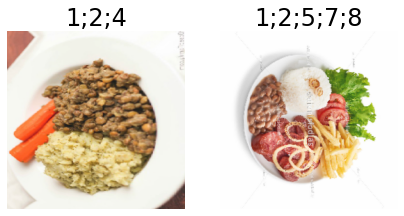

In [151]:
dataloaders.train.show_batch(max_n=2, figsize=(7, 7), cmap=cmap, norm=norm,alpha=0.9)

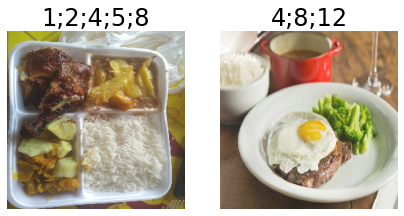

In [152]:
dataloaders.valid.show_batch(max_n=2, figsize=(7, 7), cmap=cmap, norm=norm,alpha=0.9)

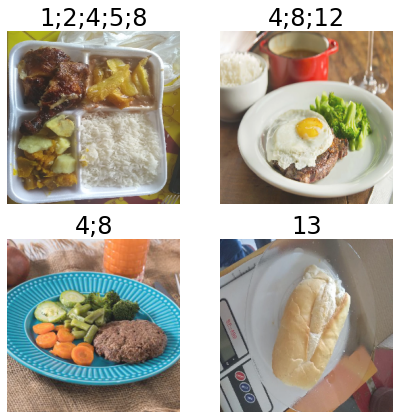

In [153]:
test_dl.show_batch(max_n=4, figsize=(7, 7), cmap=cmap, norm=norm,alpha=0.9)

## Metrics

In [154]:
metrics = [accuracy_multi, F1ScoreMulti(labels=np.arange(0, len(codes)-1)), HammingLossMulti(labels=np.arange(0, len(codes)-1))]

## Model

In [156]:
# EarlyStoppingCallback(monitor='miou',patience=50) -> if patience is too high, this may cause error in learner.validate()
modelCallbacks = [ShowGraphCallback]
opt_func = Adam

from fastaiCustomLosses import CombinedLossTunable
#loss_func = CrossEntropyLossFlat(weight=lossClassWeights, axis=1)
# loss_func = FocalLossFlat(weight=lossClassWeights, axis=1)
# loss_func = CombinedLossTunable()
loss_func = BCEWithLogitsLossFlat()

learner = cnn_learner(dataloaders, resnet34, loss_func=loss_func, opt_func=opt_func, metrics=metrics, cbs=modelCallbacks).to_fp32()

In [ ]:
# learner.load(path + 'stage-2-brazilFoods', strict=False)
# learner.load_state_dict(torch.load(path + 'stage-2-brazilFoods.pth'), strict=False)
# learner.model.load_state_dict(torch.load(path + 'stage-2-brazilFoods.pth'), strict=False)
# test = Learner(dataloaders,resnet34)
# learner.load('stage-1-best')

## Training

SuggestedLRs(valley=0.0030199517495930195)

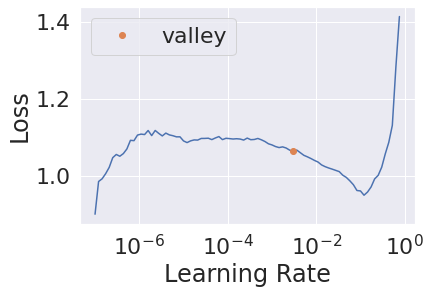

In [157]:
learner.lr_find()

In [158]:
lr = 3e-3
freezeEpochs = 5
unfreezeEpochs = 5
wd = 1e-2
learner.freeze()

Better model found at epoch 0 with accuracy_multi value: 0.5248062014579773.


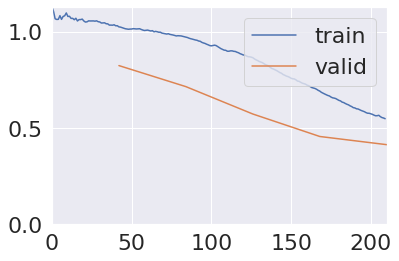

Better model found at epoch 1 with accuracy_multi value: 0.5883721709251404.
Better model found at epoch 2 with accuracy_multi value: 0.7131783962249756.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


Better model found at epoch 3 with accuracy_multi value: 0.8031007647514343.
Better model found at epoch 4 with accuracy_multi value: 0.8310077786445618.


Better model found at epoch 0 with accuracy_multi value: 0.8542635440826416.


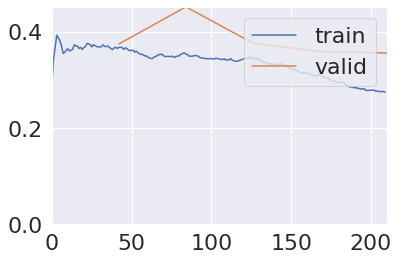

Better model found at epoch 3 with accuracy_multi value: 0.8674419522285461.


In [159]:
run = wandb.init(project="diabetesLearning-MultiLabel") # track machine learning experiment
fitCallbacks = [WandbCallback(log='all'), SaveModelCallback(every_epoch=False, monitor='accuracy_multi', fname='stage-1-best',with_opt=True), GradientAccumulation(n_acc=gradientAcc)]
# learner.fit_one_cycle(epochs, slice(lr), pct_start=0.8, wd=wd, cbs=fitCallbacks)
# learner.fit_flat_cos(epochs, slice(lr), wd=wd,cbs=fitCallbacks)
learner.fine_tune(unfreezeEpochs, base_lr=lr, freeze_epochs=freezeEpochs, pct_start=0.3, wd=wd, cbs=fitCallbacks)
run.finish()

## Fine-tunning (optional)

In [ ]:
# import gc
# torch.cuda.empty_cache()
# gc.collect()

In [ ]:
# learner = unet_learner(dataloaders, resnet34, loss_func=CrossEntropyLossFlat(axis=1), metrics=metrics, cbs=callbacks,
#                        wd_bn_bias=True).to_fp16()
# learner.load('stage-1-best')


In [ ]:
learner.unfreeze()
# learner.lr_find()

In [ ]:
lrs = slice(lr/400,lr/4)
epochs = 50
wd = 1e-2

/content/drive/My Drive/Colab Notebooks/DiabetesLearning/fastaiMetrics.py:39: RuntimeWarning: invalid value encountered in true_divide
  iou_index = per_class_TP / (per_class_TP + per_class_FP + per_class_FN)


Better model found at epoch 0 with acc_segmentation value: 0.5323270559310913.


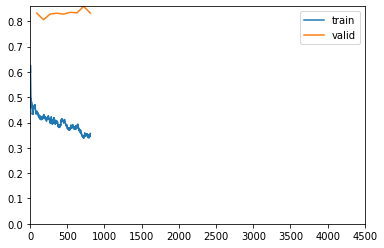

Better model found at epoch 1 with acc_segmentation value: 0.5447819232940674.
No improvement since epoch 1: early stopping


In [ ]:
#run = wandb.init(project="diabetesLearning") # track machine learning experiment
fitCallbacks = [WandbCallback(log='all'), SaveModelCallback(every_epoch=False, monitor='acc_segmentation', fname='stage-2-best',with_opt=True),GradientAccumulation(n_acc=gradientAcc)]
# learner.fit_one_cycle(epochs, lrs, pct_start=0.3, wd=wd, cbs=fitCallbacks)
learner.fit_flat_cos(epochs, lrs, wd=wd, cbs=fitCallbacks)
run.finish()

In [ ]:
# learner.load('stage-2-best')
# learner.save('stage-2-size350-bestEpoch')

## FastAI Validation

In [160]:
metricsNames = ['Loss', 'Accuracy', 'F1Score', 'HammingLoss']

In [161]:
#### check if model overfits ####
trainset = tuple(zip(metricsNames,learner.validate(dl=dataloaders.train)))

#### validate validset ####
validset = tuple(zip(metricsNames,learner.validate(dl=dataloaders.valid)))

"Trainset", trainset, "Validset", validset

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


('Trainset',
 (('Loss', 0.1583588719367981),
  ('Accuracy', 0.9392857551574707),
  ('F1Score', 0.7291063825076541),
  ('HammingLoss', 0.060714285714285714)),
 'Validset',
 (('Loss', 0.3595472574234009),
  ('Accuracy', 0.8674419522285461),
  ('F1Score', 0.38937424113334956),
  ('HammingLoss', 0.1325581395348837)))

In [162]:
dl = dataloaders.valid

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


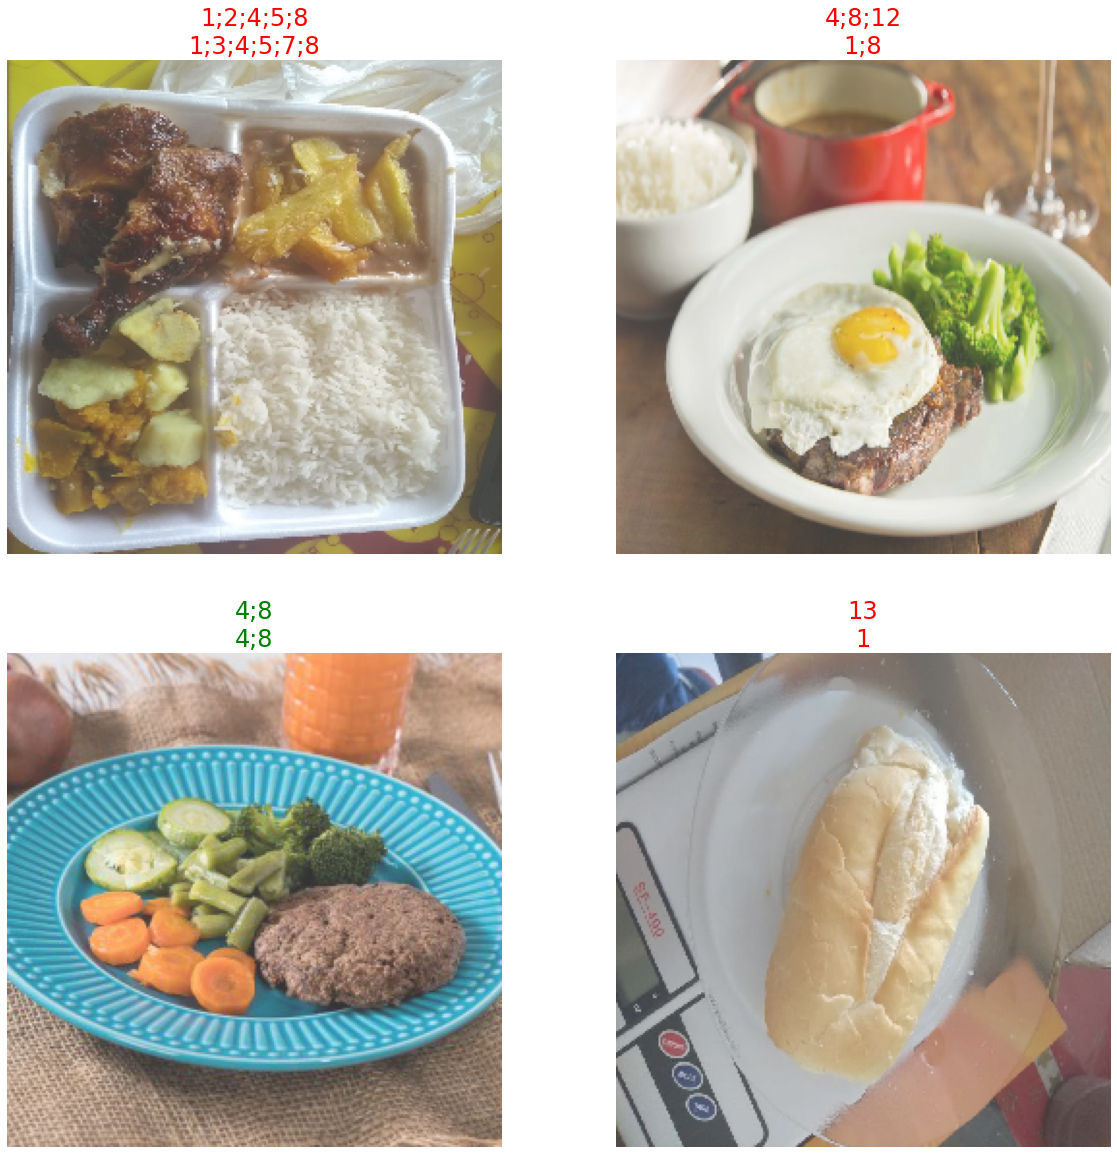

In [163]:
learner.show_results(dl=dl, figsize=(20,20), max_n=4, cmap=cmap, norm=norm,alpha=0.8)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


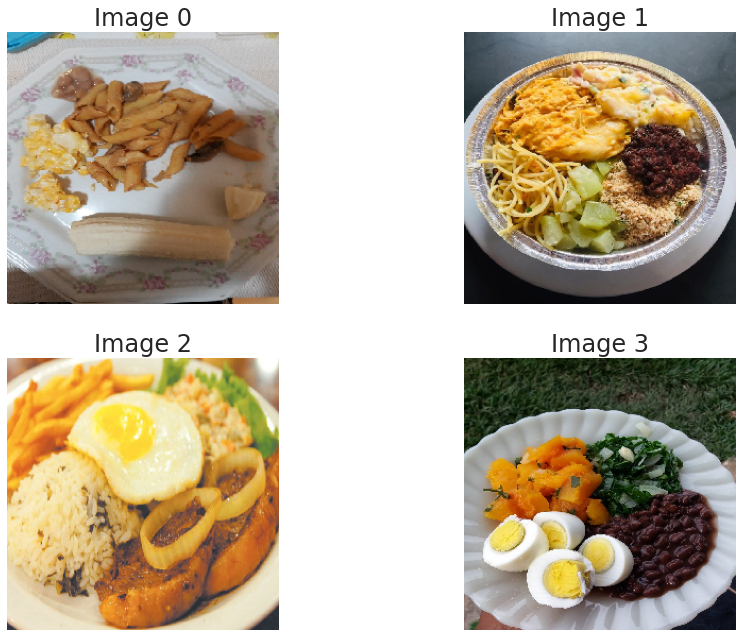

In [164]:
interp = ClassificationInterpretation.from_learner(learner, dl=test_dl)
losses,idxs = interp.top_losses()
interp.plot_top_losses(4, figsize=(15,11), cmap=cmap, norm=norm)

[(2, 1, 113), (1, 2, 58)]

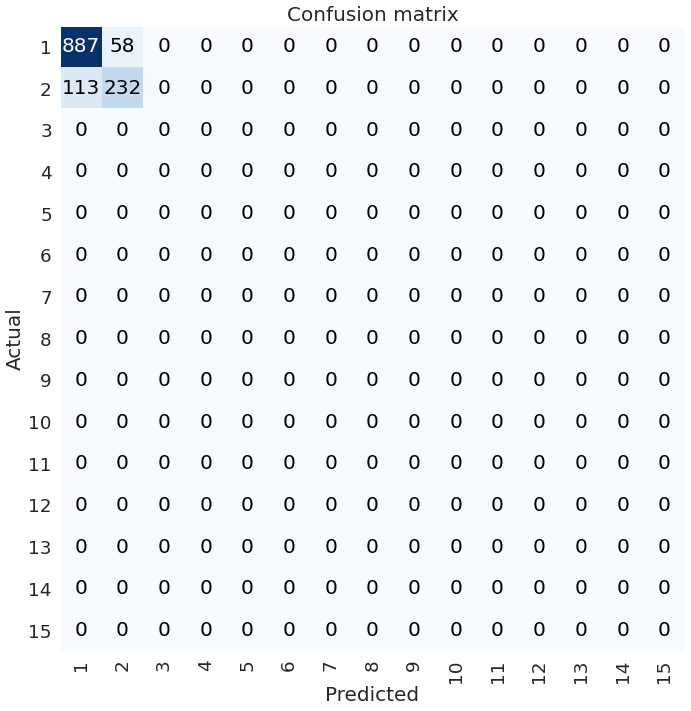

In [165]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
interp.most_confused(min_val=10)

## Sklearn Validation

In [166]:
from sklearnMetrics import Metrics
void_code = 0
metricsObject = Metrics(codes, [void_code])
id2name = {k:v for k,v in enumerate(codes)} # faz uma lista que relaciona nome e id

# LOAD ONLY IF NECESSARY
# learner = unet_learner(dataloaders, resnet34, metrics=metrics)
# learner.load('stage-1-best')

In [167]:
#input, probabilities, groundTruth, decoded, losses = learner.get_preds(dl=dl,  with_input=True, with_loss=True, with_decoded=True, act=F.softmax) #inputs, preds, groundTruth, losses
input, probabilities, groundTruth, decoded = learner.get_preds(dl=dl,  with_input=True, with_loss=False, with_decoded=True, act=F.softmax) #inputs, preds, groundTruth, losses

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/fastai/learner.py:258: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  res[pred_i] = act(res[pred_i])


In [168]:
print(metricsObject.getAccuracy(decoded.flatten().numpy(), groundTruth.flatten().numpy()))

0.14782608695652175


In [169]:
print(metricsObject.get_f1Score(decoded.flatten().numpy(), groundTruth.flatten().numpy()))

0.25310173697270477


In [170]:
confusionMatrix = metricsObject.getConfusionMatrix(decoded.flatten().numpy(), groundTruth.flatten().numpy(), plot=False)

In [171]:
mostConfused = metricsObject.mostConfused(confusionMatrix, numberOfConfusions=4)

print("Actual", "   Predicted", "   Wrong pixels\n")
mostConfused

Actual    Predicted    Wrong pixels



[['TiposArroz', 'TiposArroz', 0],
 ['TiposArroz', 'TiposArroz', 0],
 ['TiposArroz', 'TiposArroz', 0],
 ['TiposArroz', 'TiposArroz', 0]]

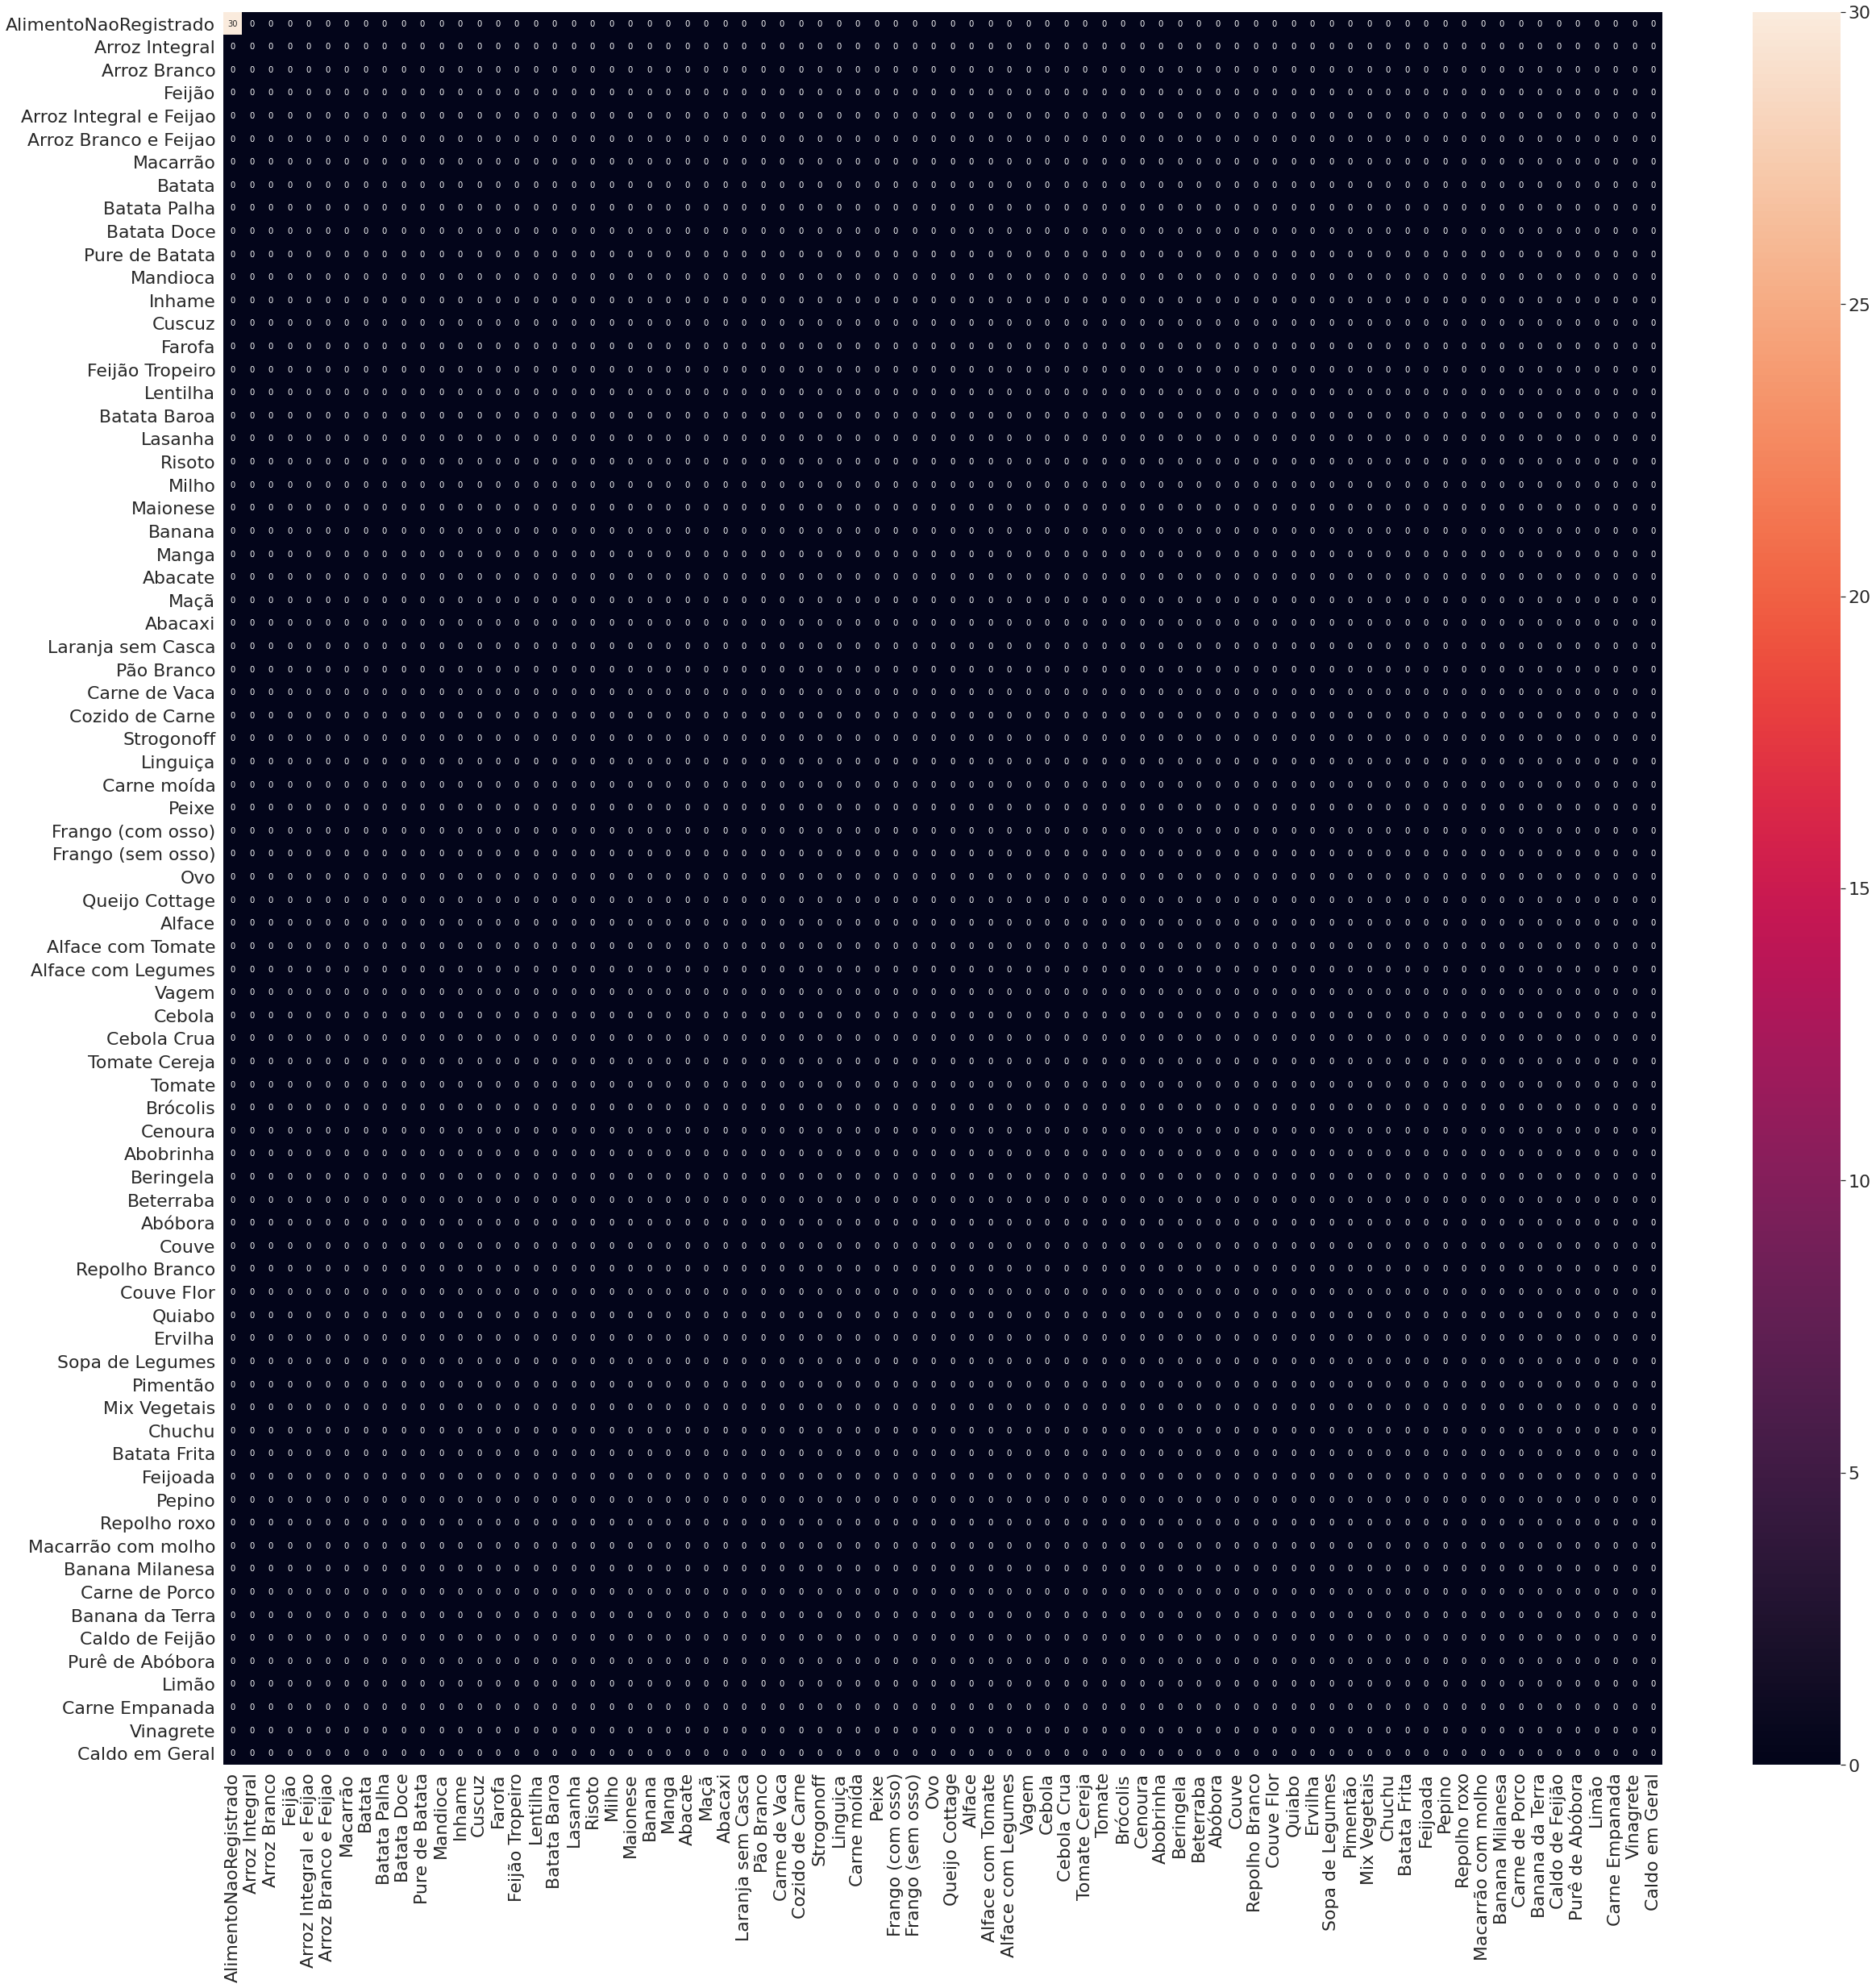

In [128]:
#plot confusion matrix (take some time, too big the matrix). Think in a better way to visualize (check for most confuseds)

metricsObject.plotConfusionMatrix(confusionMatrix, font_scale=2, removeDiagonal=False)

In [172]:
print(metricsObject.getClassificationReport(decoded.flatten().numpy(), groundTruth.flatten().numpy()))

              precision    recall  f1-score   support

  TiposArroz       0.88      0.15      0.25       345
 Leguminosas       1.00      1.00      1.00         0
      Frutas       1.00      1.00      1.00         0
     Legumes       1.00      1.00      1.00         0
     Batatas       1.00      1.00      1.00         0
        Pure       1.00      1.00      1.00         0
      Salada       1.00      1.00      1.00         0
 CarneAnimal       1.00      1.00      1.00         0
       Massa       1.00      1.00      1.00         0
     Queijos       1.00      1.00      1.00         0
      Farofa       1.00      1.00      1.00         0
         Ovo       1.00      1.00      1.00         0
        Paes       1.00      1.00      1.00         0
       Torta       1.00      1.00      1.00         0
      Caldos       1.00      1.00      1.00         0

   micro avg       0.88      0.15      0.25       345
   macro avg       0.99      0.94      0.95       345
weighted avg       0.88   

## Check some particular image details

In [ ]:
from collections import OrderedDict

id2name = {k:v for k,v in enumerate(codes)} # faz uma lista que relaciona nome e id

def getFoodsInImage(tensor, removeVoid=False):
    foods, counts = np.unique(tensor,return_counts=True)
    if removeVoid:
        counts = np.delete(counts, 0) #tira o void na posicao 0 do array
        foods = np.delete(foods, 0) #tira o void na posicao 0 do array
    
    foodNames = []
    print(f'Numero de alimentos: {len(foods)}')
    for food in foods:
        foodNames = np.append(foodNames,id2name[food])
    dictCounts = dict(zip(foodNames, counts))
    dictCounts = OrderedDict(sorted(dictCounts.items(), key=lambda x: x[1], reverse=True))
    print(dictCounts)
    return dictCounts

def getMostAppearances(foodCountsDict, k = 3):
    sortedDict = OrderedDict(sorted(foodCountsDict.items(), key=lambda x: x[1], reverse=True))
    topKDict = {}
    for count, (key, v) in enumerate(foodCountsDict.items()):
        if count == k:
            break
        elif key != "NaoAlimento":
            topKDict[key] = v
        else:
            k += 1 # increment k if find NaoAlimento in the first positions
    
    return topKDict
        


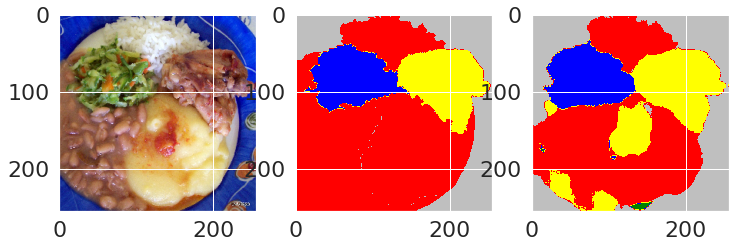

In [ ]:
idx = 6
fig = plt.figure(figsize=(12,12))

# denorm to original image
rawImage = copy(input[idx])

nrm = Normalize.from_stats(*imagenet_stats)
image = nrm.decode(rawImage) #fastai version 2.3.1 needs two denorms!!!! FUCK YOU FASTAI!!!
image = nrm.decode(image).clamp(0,1).squeeze().permute(1,2,0) # denorm image from imagenet stats

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image)

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(groundTruth[idx], cmap=cmap, norm=norm)

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(decoded[idx], cmap=cmap, norm=norm)

In [ ]:
print("Ground truth\n")
sample = groundTruth[idx]
gtDictCounts = getFoodsInImage(sample)


Ground truth

Numero de alimentos: 4
OrderedDict([('Carbs', 36171), ('NaoAlimento', 14300), ('Proteina', 8115), ('Vegetais', 6950)])


In [ ]:
print("Prediction\n")
sample = decoded[idx]
decodedDictCounts = getFoodsInImage(sample)


Prediction

Numero de alimentos: 5
OrderedDict([('Carbs', 25732), ('NaoAlimento', 19203), ('Proteina', 13139), ('Vegetais', 7257), ('Frutas', 205)])


In [ ]:
# get low prob classes

bestProbs, bestProbsIdx = torch.max(probabilities[idx], dim=0)
lowProbs = []
lowProbsIdx = []

mask = bestProbs < 0.5
lowProbsIdx = bestProbsIdx[mask]
lowProbDictCounts = getFoodsInImage(lowProbsIdx)

print("\nPercentual de pixeis com baixa probabilidade\n")
for key, value in lowProbDictCounts.items():
    pct = float(value/decodedDictCounts[key]*100)
    print(key, '{:.2f}'.format(pct), "%" )

Numero de alimentos: 5
OrderedDict([('Carbs', 15695), ('Proteina', 6658), ('NaoAlimento', 3616), ('Vegetais', 2058), ('Frutas', 205)])

Percentual de pixeis com baixa probabilidade

Carbs 60.99 %
Proteina 50.67 %
NaoAlimento 18.83 %
Vegetais 28.36 %
Frutas 100.00 %


In [ ]:
# get high prob classes

bestProbs, bestProbsIdx = torch.max(probabilities[idx], dim=0)

mask = bestProbs > 0.5
highProbsIdx = bestProbsIdx[mask]
highProbDictCounts = getFoodsInImage(highProbsIdx)

print("\nPercentual de pixeis com alta probabilidade\n")
for key, value in highProbDictCounts.items():
    pct = float(value/decodedDictCounts[key]*100)
    print(key, '{:.2f}'.format(pct), "%" )

Numero de alimentos: 5
OrderedDict([('Carbs', 24024), ('NaoAlimento', 18602), ('Proteina', 11822), ('Vegetais', 6995), ('Frutas', 80)])

Percentual de pixeis com alta probabilidade

Carbs 93.36 %
NaoAlimento 96.87 %
Proteina 89.98 %
Vegetais 96.39 %
Frutas 39.02 %


## Predictions of new input data

In [ ]:
# always load it!

learner = unet_learner(dataloaders, resnet34, self_attention=False, act_cls=Mish)
learner.load('stage-1-best')

In [ ]:
#input should be a PIL object

index = 50
img = dataloaders.valid_ds[index][0]

# img_pil = Image.open("3.jpg")
# img = np.asarray(img_pil.resize((400,400)))

pred = learner.predict(img)

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(pred[0],cmap=cmap)

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img)

foods = getFoodsInImage(pred[0])
k = 3
mostAppear = list(getMostAppearances(foods, k=k).keys())
print('\n{} principais alimentos:'.format(k),mostAppear)